<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/EcuacionesPrueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar CSV
df_2017 = pd.read_csv("/content/drive/MyDrive/PruebaDeTesis/Datos2017_PruebaArellano.csv")

In [ ]:
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,ea,ed,Rso,Ra,G,ET0FAO
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,1.073220,1.417160,15.524844,20.589979,0.0,2.086800
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,1.013411,1.251170,15.563818,20.641669,0.0,2.130496
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,0.899901,1.406939,15.605844,20.697406,0.0,2.491735
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,0.863692,1.454673,15.650905,20.757168,0.0,2.709152
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,0.924018,1.428367,15.698982,20.820931,0.0,2.795926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,0.653873,0.914465,15.376250,20.392905,0.0,2.729585
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,0.747966,1.075837,15.399758,20.424083,0.0,3.317393
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,0.834853,1.245870,15.426383,20.459393,0.0,3.377725
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,0.859733,1.165381,15.456113,20.498824,0.0,3.441384


In [ ]:
Rs_2017 = df_2017['Rs']
Rn_2017 = df_2017['Rn']
TaMax_2017 = df_2017['TaMax ']
TaMin_2017 = df_2017['TaMin']
Tmean_2017 = df_2017['Tmean']
u2_2017 = df_2017['u2']
RH_2017 = df_2017['RH']
slope_2017 = df_2017['slope']
es_2017 = df_2017['es']
ea_2017 = df_2017['ea']
ed_2017 = df_2017['ed']
Rso_2017 = df_2017['Rso']
Ra_2017 = df_2017['Ra']
G_2017 = df_2017['G']
ET0_2017 = df_2017['ET0FAO']


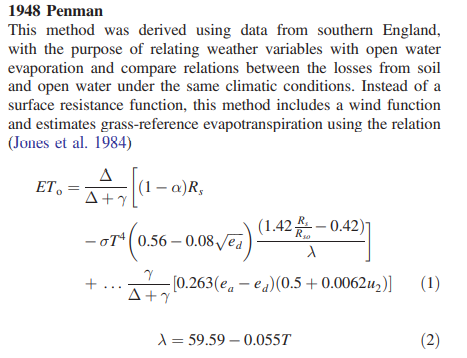

In [ ]:
#Se definirá la función de Penman de 1948
def Penman1948(slope, Rs, Tmean, ed, Rso, ea, u2):
  et = (slope/(slope + 0.66))*(((1-0.05)*Rs)-((0.000000004896 * Tmean**4)*(0.56-(0.08*(ed**(0.5))))*(((1.42*(Rs/Rso))-0.42)/(59.59-(0.055*Tmean))))) + ((0.66/(slope+0.66))*(0.263*(ea - ed)*(0.5+(0.0062*u2))))
  return et


#Calculos
ETPenman1948_2017 = Penman1948(slope_2017, Rs_2017, Tmean_2017, ed_2017, Rso_2017, ea_2017, u2_2017)

df_2017['ETPenman1948'] = ETPenman1948_2017
df_2017


,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,ea,ed,Rso,Ra,G,ET0FAO,ETPenman1948
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,1.073220,1.417160,15.524844,20.589979,0.0,2.086800,1.056472
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,1.013411,1.251170,15.563818,20.641669,0.0,2.130496,1.702529
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,0.899901,1.406939,15.605844,20.697406,0.0,2.491735,1.895070
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,0.863692,1.454673,15.650905,20.757168,0.0,2.709152,1.923893
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,0.924018,1.428367,15.698982,20.820931,0.0,2.795926,2.196700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,0.653873,0.914465,15.376250,20.392905,0.0,2.729585,1.860210
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,0.747966,1.075837,15.399758,20.424083,0.0,3.317393,2.409021
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,0.834853,1.245870,15.426383,20.459393,0.0,3.377725,2.509505
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,0.859733,1.165381,15.456113,20.498824,0.0,3.441384,2.421811


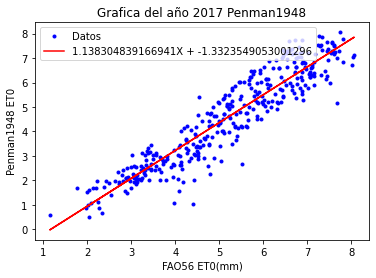

In [ ]:
#Ajuste de polinomios para Penman1948
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETPenman1948_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Penman1948 contra ET0
plt.title('Grafica del año 2017 Penman1948')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Penman1948 ET0')
plt.plot(ET0_2017, ETPenman1948_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

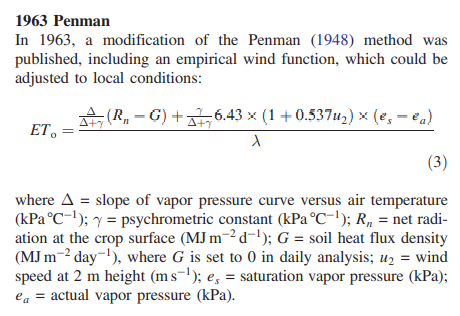

In [ ]:
#Función de Penman 1963
def Penman1963(slope, Rn, G, u2, es, ea, Tmean):
  et = (((slope/(slope + 0.66))*(Rn - G)) + ((0.66/(slope + 0.66)) * 6.43 * (1 + (0.537 * u2)) * (es - ea))) / (59.59 - (0.055*Tmean))
  return et


#Calculos
ETPenman1963_2017 = Penman1963(slope_2017, Rn_2017, G_2017, u2_2017, es_2017, ea_2017, Tmean_2017)

df_2017['ETPenman1963'] = ETPenman1963_2017
df_2017


,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,ea,ed,Rso,Ra,G,ET0FAO,ETPenman1948,ETPenman1963
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,1.073220,1.417160,15.524844,20.589979,0.0,2.086800,1.056472,0.145157
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,1.013411,1.251170,15.563818,20.641669,0.0,2.130496,1.702529,0.138285
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,0.899901,1.406939,15.605844,20.697406,0.0,2.491735,1.895070,0.202862
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,0.863692,1.454673,15.650905,20.757168,0.0,2.709152,1.923893,0.243419
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,0.924018,1.428367,15.698982,20.820931,0.0,2.795926,2.196700,0.242749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,0.653873,0.914465,15.376250,20.392905,0.0,2.729585,1.860210,0.265399
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,0.747966,1.075837,15.399758,20.424083,0.0,3.317393,2.409021,0.327450
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,0.834853,1.245870,15.426383,20.459393,0.0,3.377725,2.509505,0.331547
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,0.859733,1.165381,15.456113,20.498824,0.0,3.441384,2.421811,0.322132


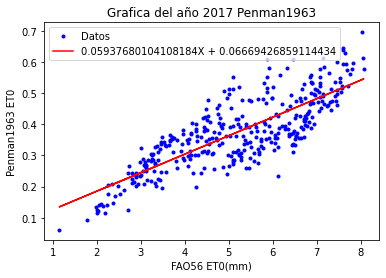

In [ ]:
#Ajuste de polinomios para Penman1963
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETPenman1963_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Penman1963 contra ET0
plt.title('Grafica del año 2017 Penman1963')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Penman1963 ET0')
plt.plot(ET0_2017, ETPenman1963_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

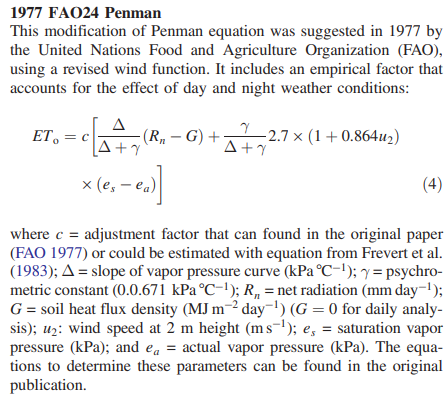

In [ ]:
#Definición de la ecuacion de Penman 1977 (FAO24) con la constante c aproximada a 0.27
def Penman1977(slope, Rn, G, u2, es, ea):
  et = 0.27*(((slope/(slope+0.66))*(Rn - G)) + ((0.66/(slope + 0.66))*2.7*(1+(0.864*u2))*(es - ea)))
  return et

#Calculos
ETPenman1977_2017 = Penman1977(slope_2017, Rn_2017, G_2017, u2_2017, es_2017, ea_2017)

df_2017['ETPenman1977'] = ETPenman1977_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,ea,ed,Rso,Ra,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,1.073220,1.417160,15.524844,20.589979,0.0,2.086800,1.056472,0.145157,1.331078
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,1.013411,1.251170,15.563818,20.641669,0.0,2.130496,1.702529,0.138285,1.250412
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,0.899901,1.406939,15.605844,20.697406,0.0,2.491735,1.895070,0.202862,1.763760
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,0.863692,1.454673,15.650905,20.757168,0.0,2.709152,1.923893,0.243419,2.102516
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,0.924018,1.428367,15.698982,20.820931,0.0,2.795926,2.196700,0.242749,2.107276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,0.653873,0.914465,15.376250,20.392905,0.0,2.729585,1.860210,0.265399,2.274387
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,0.747966,1.075837,15.399758,20.424083,0.0,3.317393,2.409021,0.327450,2.846685
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,0.834853,1.245870,15.426383,20.459393,0.0,3.377725,2.509505,0.331547,2.892705
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,0.859733,1.165381,15.456113,20.498824,0.0,3.441384,2.421811,0.322132,2.850042


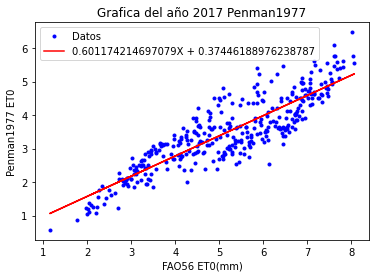

In [ ]:
#Ajuste de polinomios para Penman1977
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETPenman1977_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Penman1963 contra ET0
plt.title('Grafica del año 2017 Penman1977')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Penman1977 ET0')
plt.plot(ET0_2017, ETPenman1977_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

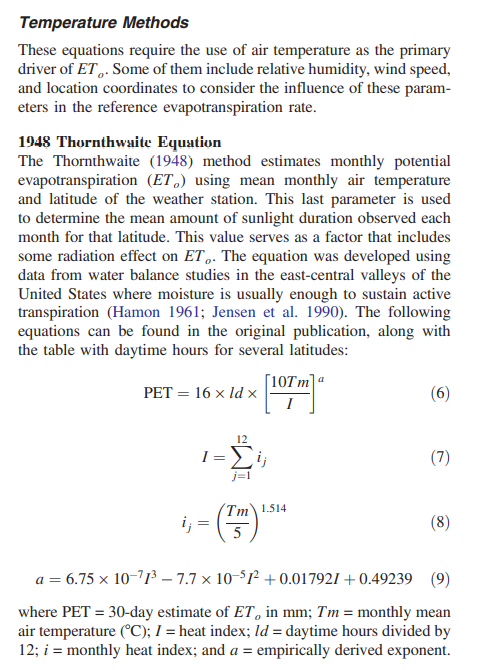

In [ ]:
#Definición de la ecuación de Thornthwaite
def Thorntwaite():
  et = 0
  return et

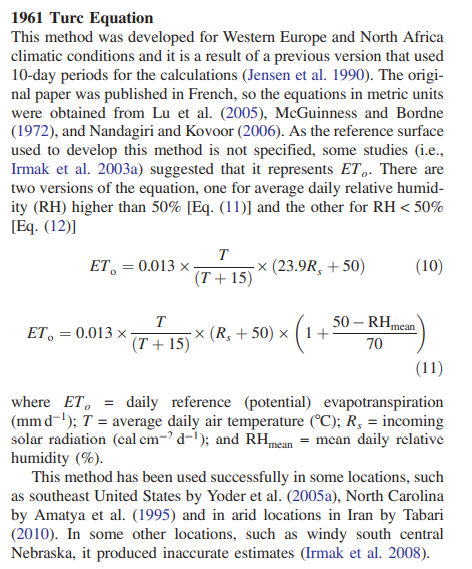

In [ ]:
#Definición de la ecuación de Turc, se tomara en cuenta las ecuaciones dependiendo de la humedad RH (RH > 50% y RH < 50%)
def Turc(RH, Tmean, Rs):
  et = 0.013 * (Tmean/(Tmean + 15)) * ((23.9 * Rs) + 50)
  
  return et

#Calculos
ETTurc_2017 = Turc(RH_2017, Tmean_2017, Rs_2017)

df_2017['Turc'] = ETTurc_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,ea,ed,Rso,Ra,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977,Turc
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,1.073220,1.417160,15.524844,20.589979,0.0,2.086800,1.056472,0.145157,1.331078,1.525771
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,1.013411,1.251170,15.563818,20.641669,0.0,2.130496,1.702529,0.138285,1.250412,2.244120
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,0.899901,1.406939,15.605844,20.697406,0.0,2.491735,1.895070,0.202862,1.763760,2.444471
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,0.863692,1.454673,15.650905,20.757168,0.0,2.709152,1.923893,0.243419,2.102516,2.431041
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,0.924018,1.428367,15.698982,20.820931,0.0,2.795926,2.196700,0.242749,2.107276,2.715123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,0.653873,0.914465,15.376250,20.392905,0.0,2.729585,1.860210,0.265399,2.274387,2.362706
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,0.747966,1.075837,15.399758,20.424083,0.0,3.317393,2.409021,0.327450,2.846685,2.861733
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,0.834853,1.245870,15.426383,20.459393,0.0,3.377725,2.509505,0.331547,2.892705,2.924291
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,0.859733,1.165381,15.456113,20.498824,0.0,3.441384,2.421811,0.322132,2.850042,2.846635


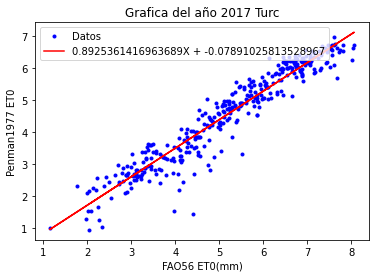

In [ ]:
#Ajuste de polinomios para Turc
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETTurc_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Trc contra ET0
plt.title('Grafica del año 2017 Turc')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Turc ET0')
plt.plot(ET0_2017, ETTurc_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

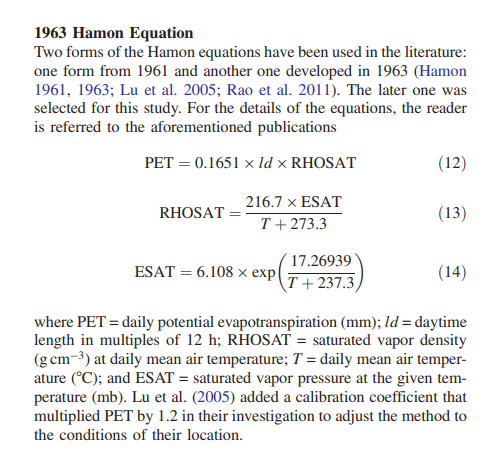

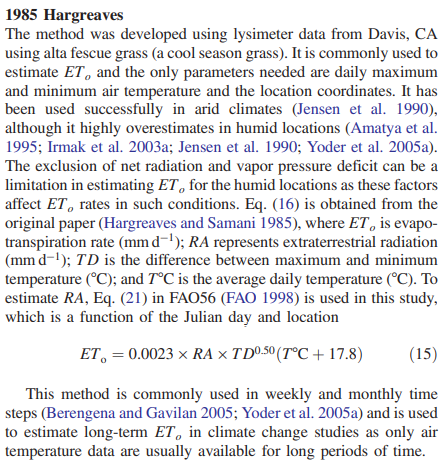

In [ ]:
#Definición de la ecuación de Hargreaves
def Hargreaves(Ra, TaMax, TaMin, Tmean):
  et = 0.0023 * Ra * ((TaMax - TaMin)**(0.5)) * (Tmean + 17.8)
  return et


#Calculos
ETHargreaves_2017 = Hargreaves(Ra_2017, TaMax_2017, TaMin_2017, Tmean_2017 )

df_2017['Hargreaves'] = ETHargreaves_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,...,Rso,Ra,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977,Turc,Hargreaves,Makkink
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,...,15.524844,20.589979,0.0,2.086800,1.056472,0.145157,1.331078,1.525771,5.147446,0.012022
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,...,15.563818,20.641669,0.0,2.130496,1.702529,0.138285,1.250412,2.244120,5.509474,0.018972
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,...,15.605844,20.697406,0.0,2.491735,1.895070,0.202862,1.763760,2.444471,6.727369,0.021411
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,...,15.650905,20.757168,0.0,2.709152,1.923893,0.243419,2.102516,2.431041,7.038067,0.021821
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,...,15.698982,20.820931,0.0,2.795926,2.196700,0.242749,2.107276,2.715123,7.341994,0.024707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,...,15.376250,20.392905,0.0,2.729585,1.860210,0.265399,2.274387,2.362706,6.307928,0.020718
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,...,15.399758,20.424083,0.0,3.317393,2.409021,0.327450,2.846685,2.861733,7.514101,0.026814
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,...,15.426383,20.459393,0.0,3.377725,2.509505,0.331547,2.892705,2.924291,7.597189,0.028013
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,...,15.456113,20.498824,0.0,3.441384,2.421811,0.322132,2.850042,2.846635,7.146107,0.026927


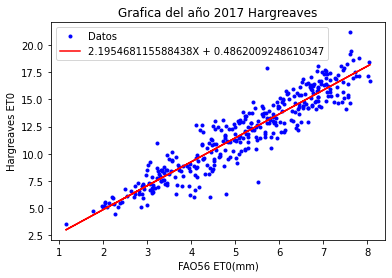

In [ ]:
#Ajuste de polinomios para Hargreaves
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETHargreaves_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Hargreaves contra ET0
plt.title('Grafica del año 2017 Hargreaves')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Hargreaves ET0')
plt.plot(ET0_2017, ETHargreaves_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

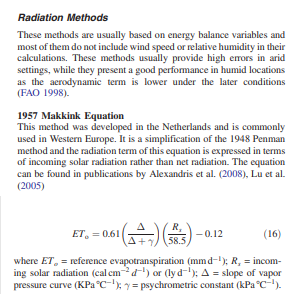

In [ ]:
#Definición de la ecuación de Makkink
def Makkink(slope, Rs):
  #Se necesita la Radiacion en  W/m2
  RsW = Rs * 1000000/86400
  et = (0.61 * (slope/(slope + 0.066)) * (RsW)) - 0.12
  #Convirtiendo de nuevo a unidades de mm/d
  et = et*(86400/1000000)/2.45
  return et

#Calculos
ETMakkink_2017 = Makkink(slope_2017, Rs_2017)

df_2017['Makkink'] = ETMakkink_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,...,Rso,Ra,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977,Turc,Hargreaves,Makkink
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,...,15.524844,20.589979,0.0,2.086800,1.056472,0.145157,1.331078,1.525771,5.147446,1.259523
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,...,15.563818,20.641669,0.0,2.130496,1.702529,0.138285,1.250412,2.244120,5.509474,2.016549
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,...,15.605844,20.697406,0.0,2.491735,1.895070,0.202862,1.763760,2.444471,6.727369,2.146764
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,...,15.650905,20.757168,0.0,2.709152,1.923893,0.243419,2.102516,2.431041,7.038067,2.086791
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,...,15.698982,20.820931,0.0,2.795926,2.196700,0.242749,2.107276,2.715123,7.341994,2.366311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,...,15.376250,20.392905,0.0,2.729585,1.860210,0.265399,2.274387,2.362706,6.307928,1.962130
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,...,15.399758,20.424083,0.0,3.317393,2.409021,0.327450,2.846685,2.861733,7.514101,2.432662
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,...,15.426383,20.459393,0.0,3.377725,2.509505,0.331547,2.892705,2.924291,7.597189,2.498030
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,...,15.456113,20.498824,0.0,3.441384,2.421811,0.322132,2.850042,2.846635,7.146107,2.430950


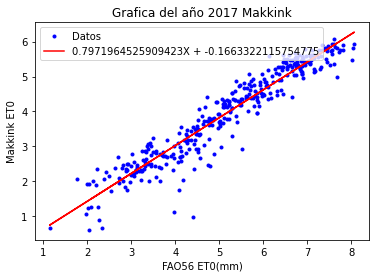

In [ ]:
#Ajuste de polinomios para Makkink
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETMakkink_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Makkink contra ET0
plt.title('Grafica del año 2017 Makkink')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Makkink ET0')
plt.plot(ET0_2017, ETMakkink_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

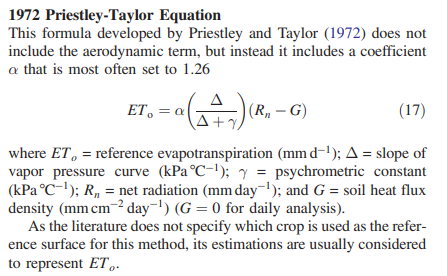

In [ ]:
#Definición de la ecuacion de Priestley-Taylor con coeficiente α = 1.26
def Priestley(slope, Rn, G):
  et = 1.26 * (slope/(slope + 0.66)) * (Rn - G)
  return et


#Calculos
ETPriestley_2017 = Priestley(slope_2017, Rn_2017, G_2017 )

df_2017['Priestley'] = ETPriestley_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,...,Ra,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977,Turc,Hargreaves,Makkink,Priestley
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,...,20.589979,0.0,2.086800,1.056472,0.145157,1.331078,1.525771,5.147446,1.259523,0.698898
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,...,20.641669,0.0,2.130496,1.702529,0.138285,1.250412,2.244120,5.509474,2.016549,0.846039
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,...,20.697406,0.0,2.491735,1.895070,0.202862,1.763760,2.444471,6.727369,2.146764,0.872708
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,...,20.757168,0.0,2.709152,1.923893,0.243419,2.102516,2.431041,7.038067,2.086791,0.884093
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,...,20.820931,0.0,2.795926,2.196700,0.242749,2.107276,2.715123,7.341994,2.366311,0.962496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,...,20.392905,0.0,2.729585,1.860210,0.265399,2.274387,2.362706,6.307928,1.962130,0.756788
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,...,20.424083,0.0,3.317393,2.409021,0.327450,2.846685,2.861733,7.514101,2.432662,0.869181
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,...,20.459393,0.0,3.377725,2.509505,0.331547,2.892705,2.924291,7.597189,2.498030,0.940689
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,...,20.498824,0.0,3.441384,2.421811,0.322132,2.850042,2.846635,7.146107,2.430950,0.946198


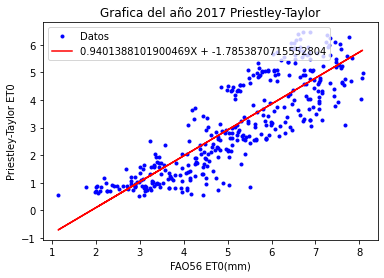

In [ ]:
#Ajuste de polinomios para Priestley-Taylor
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETPriestley_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Priestley-Taylor contra ET0
plt.title('Grafica del año 2017 Priestley-Taylor')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Priestley-Taylor ET0')
plt.plot(ET0_2017, ETPriestley_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

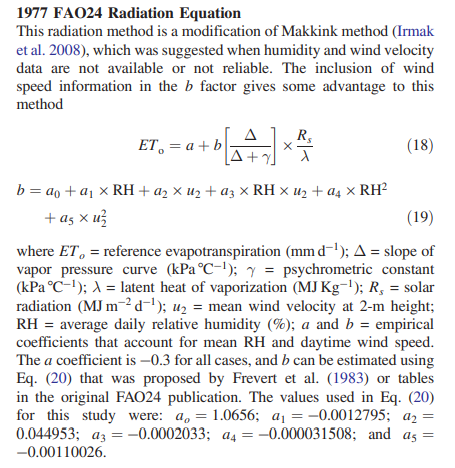

In [ ]:
#Definición de la ecuación de Radiación mostrada en FAO24 usando coeficientes a=-0.3, a0=1.0656, a1=-0.0012795, a2=0.044953, a3=-0.0002033, a4=-0.000031508, a5= -0.00110026
def Radiation1977(slope, Tmean, Rs, u2, RH):
  b = 1.0656 + (-0.0012795 * RH) + (0.044953 * u2) + (-0.0002033 * RH * u2) + (-0.000031508 * (RH)**2) + (-0.00110026 * (u2)**2)
  heat = 59.59 - (0.055 * Tmean)
  et = -0.3 + (b*(slope/(slope + 0.66)) * (Rs/heat))
  return et


#Calculos
ETRadiation1977_2017 = Radiation1977(slope_2017, Tmean_2017, Rs_2017, u2_2017, RH_2017)

df_2017['Radiation1977'] = ETRadiation1977_2017
df_2017

,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,...,G,ET0FAO,ETPenman1948,ETPenman1963,ETPenman1977,Turc,Hargreaves,Makkink,Priestley,Radiation1977
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,...,0.0,2.086800,1.056472,0.145157,1.331078,1.525771,5.147446,1.259523,0.698898,-0.283947
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,...,0.0,2.130496,1.702529,0.138285,1.250412,2.244120,5.509474,2.016549,0.846039,-0.273360
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,...,0.0,2.491735,1.895070,0.202862,1.763760,2.444471,6.727369,2.146764,0.872708,-0.269080
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,...,0.0,2.709152,1.923893,0.243419,2.102516,2.431041,7.038067,2.086791,0.884093,-0.267543
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,...,0.0,2.795926,2.196700,0.242749,2.107276,2.715123,7.341994,2.366311,0.962496,-0.262774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,...,0.0,2.729585,1.860210,0.265399,2.274387,2.362706,6.307928,1.962130,0.756788,-0.265682
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,...,0.0,3.317393,2.409021,0.327450,2.846685,2.861733,7.514101,2.432662,0.869181,-0.255278
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,...,0.0,3.377725,2.509505,0.331547,2.892705,2.924291,7.597189,2.498030,0.940689,-0.254122
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,...,0.0,3.441384,2.421811,0.322132,2.850042,2.846635,7.146107,2.430950,0.946198,-0.255520


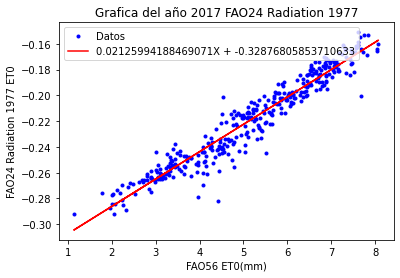

In [ ]:
#Ajuste de polinomios para FAO24 Radiation 1977
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETRadiation1977_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de FAO24 Radiation 1977 contra ET0
plt.title('Grafica del año 2017 FAO24 Radiation 1977')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('FAO24 Radiation 1977 ET0')
plt.plot(ET0_2017, ETRadiation1977_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

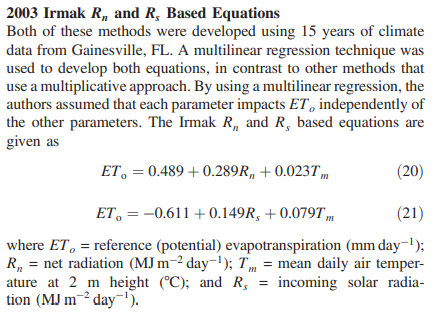

In [ ]:
#Ecuación de Irmak basado en Radiación neta Rn
def IrmakRn(Rn, Tmean):
  et = 0.489 + (0.289*Rn) + (0.023*Tmean)
  return et



#Ecuación de Irmak basado en Radiación solar Rs
def IrmakRs(Rs, Tmean):
  et = -0.611 + (0.149 * Rs) + (0.079 * Tmean)
  return et

#Calculos
ETIrmakRn_2017 = IrmakRn(Rn_2017, Tmean_2017)

df_2017['IrmakRn'] = ETIrmakRn_2017

#Calculos
ETIrmakRs_2017 = IrmakRs(Rs_2017, Tmean_2017)

df_2017['IrmakRs'] = ETIrmakRs_2017
df_2017


,Julian day,Rs,Rn,TaMax,TaMin,Tmean,u2,RH,slope,es,...,ETPenman1948,ETPenman1963,ETPenman1977,Turc,Hargreaves,Makkink,Priestley,Radiation1977,IrmakRn,IrmakRs
0,1,8.155672,3.920458,20.75,8.920,13.802083,1.867331,78.929722,0.108768,1.795470,...,1.056472,0.145157,1.331078,1.525771,5.147446,1.259523,0.698898,-0.283947,1.939460,1.694560
1,2,13.178198,4.859220,21.24,7.461,13.462854,1.415328,70.331458,0.105823,1.778962,...,1.702529,0.138285,1.250412,2.244120,5.509474,2.016549,0.846039,-0.273360,2.202960,2.416117
2,3,13.414391,4.520956,25.53,7.465,15.449299,1.204136,65.386250,0.119408,2.151736,...,1.895070,0.202862,1.763760,2.444471,6.727369,2.146764,0.872708,-0.269080,2.150890,2.608239
3,4,12.618316,4.227312,27.17,9.270,17.044236,1.236267,60.989722,0.131351,2.385112,...,1.923893,0.243419,2.102516,2.431041,7.038067,2.086791,0.884093,-0.267543,2.102711,2.615624
4,5,14.316934,4.611701,27.83,8.520,17.089514,1.249365,58.852778,0.131026,2.427018,...,2.196700,0.242749,2.107276,2.715123,7.341994,2.366311,0.962496,-0.262774,2.214841,2.872295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,11.790577,3.561207,25.56,11.580,18.168819,1.264269,39.423542,0.133897,2.319591,...,1.860210,0.265399,2.274387,2.362706,6.307928,1.962130,0.756788,-0.265682,1.936072,2.581133
361,362,14.214463,3.809938,29.36,10.940,19.470208,1.486684,39.866042,0.145919,2.698629,...,2.409021,0.327450,2.846685,2.861733,7.514101,2.432662,0.869181,-0.255278,2.037887,3.045101
362,363,14.443931,4.010601,29.99,11.570,19.817292,1.511427,44.464236,0.150961,2.801960,...,2.509505,0.331547,2.892705,2.924291,7.597189,2.498030,0.940689,-0.254122,2.103861,3.106712
363,364,14.161669,4.114667,28.64,12.020,19.378958,1.692517,43.749583,0.147345,2.663754,...,2.421811,0.322132,2.850042,2.846635,7.146107,2.430950,0.946198,-0.255520,2.123855,3.030026


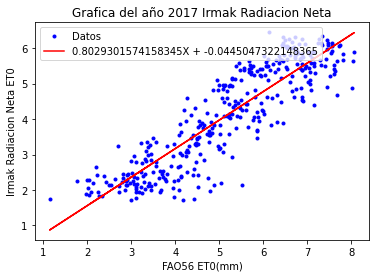

In [ ]:
#Ajuste de polinomios para Irmak Radiacion Neta
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETIrmakRn_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Irmak Rs contra ET0
plt.title('Grafica del año 2017 Irmak Radiacion Neta')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Irmak Radiacion Neta ET0')
plt.plot(ET0_2017, ETIrmakRn_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")

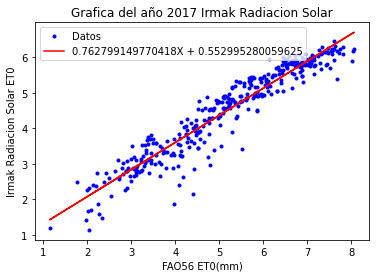

In [ ]:
#Ajuste de polinomios para Irmak Radiacion Solar
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(ET0_2017, ETIrmakRs_2017, 1)

# Valores de y calculados del ajuste
y_ajuste = p[0]*ET0_2017 + p[1]       #Ecuación de la recta

texto = str(p[0]) + "X + "+ str(p[1])

#Grafica de Irmak Radiacion Solar contra ET0
plt.title('Grafica del año 2017 Irmak Radiacion Solar')
plt.xlabel('FAO56 ET0(mm)')
plt.ylabel('Irmak Radiacion Solar ET0')
plt.plot(ET0_2017, ETIrmakRs_2017, 'b.') 
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(ET0_2017, y_ajuste, 'r-')

plt.legend(("Datos", texto), loc="upper left")